# Part1--Make plots for minimization & equilibration

### a) load in the data file

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
# Reading a well formatted, white space delimited table into arrays:
step,pot_e= np.loadtxt('./potential.xvg', skiprows=24, unpack=True)
time_tem,temp = np.loadtxt('./temperature.xvg', skiprows=24, unpack=True)
time_pre,press = np.loadtxt('./pressure.xvg', skiprows=24, unpack=True)
time_den,dens= np.loadtxt('./density.xvg', skiprows=24, unpack=True)

In [12]:
# print them separately to check if everything is ok

step
len(step)
#step.shape

pot_e
time_pre
press
time_den
dens


array([ 994.001465, 1016.321228, 1016.863037, 1015.311096, 1019.184265,
       1021.180847, 1017.703613, 1019.465088, 1018.702087, 1016.786316,
       1018.32196 , 1021.309753, 1018.697693, 1016.450256, 1018.547363,
       1023.676208, 1021.831116, 1018.973328, 1017.654419, 1020.656677,
       1019.166382, 1021.899658, 1015.364502, 1016.661316, 1019.345703,
       1017.042664, 1022.032532, 1021.990234, 1020.486877, 1021.59375 ,
       1021.952576, 1018.775208, 1018.248779, 1014.976074, 1021.796204,
       1016.824097, 1018.763367, 1015.725403, 1016.216003, 1017.405823,
       1018.233276, 1019.402039, 1022.115723, 1016.141785, 1016.359924,
       1020.794922, 1020.186523, 1021.04425 , 1019.777832, 1024.287231,
       1018.652832, 1017.153442, 1020.21759 , 1015.813965, 1019.447327,
       1015.531616, 1016.416321, 1021.921204, 1015.148987, 1018.218506,
       1016.690979, 1021.302734, 1019.126404, 1017.595825, 1018.686523,
       1019.172302, 1016.289734, 1019.286621, 1022.087708, 1014.

### b) Make 3 separate plots

In [13]:


def quantity_vs_time(time_or_step_array, time_or_step_name_unit, quantity_array, quantity_name, quantity_unit):
    
    ## Draw time(x-axis) and quantity(y-axis) in the chart, add label
    plt.plot(time_or_step_array, quantity_array)
    #plt.legend(title='')
    plt.xlabel(f'{time_or_step_name_unit}',fontsize=12)                          ## Add x-axis label
    plt.ylabel(f'{quantity_name}({quantity_unit})',fontsize=12)               ## Add y-axis label
    plt.title(f'{quantity_name}',fontsize=20)                         ## Set the title of the chart
    plt.savefig(f"../Figures/{quantity_name}.pdf",format="pdf")
    print(f"Plot saved: ../Figures/{quantity_name}.pdf")
    plt.show()                                                                ## plot the chart
   

Plot saved: ../Figures/Potential_energy_Minimization.pdf


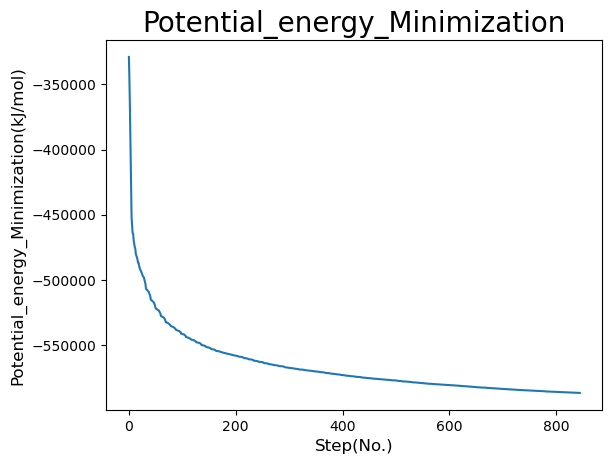

Plot saved: ../Figures/Temperature_NVT_Equilibration.pdf


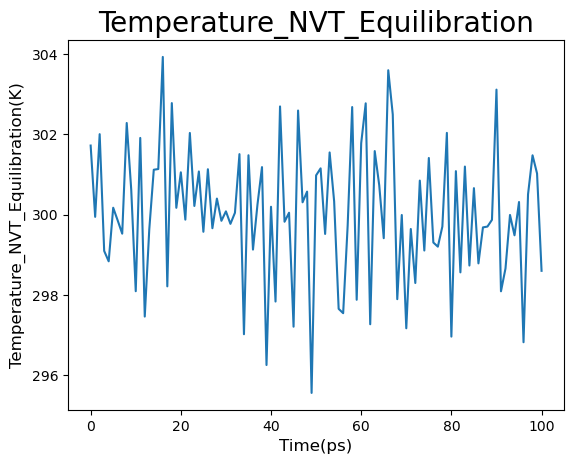

Plot saved: ../Figures/Pressure_NPT_Equilibration.pdf


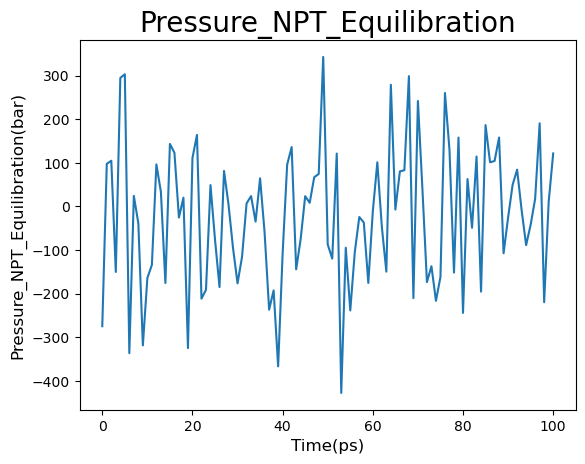

Plot saved: ../Figures/Density_NPT_Equilibration.pdf


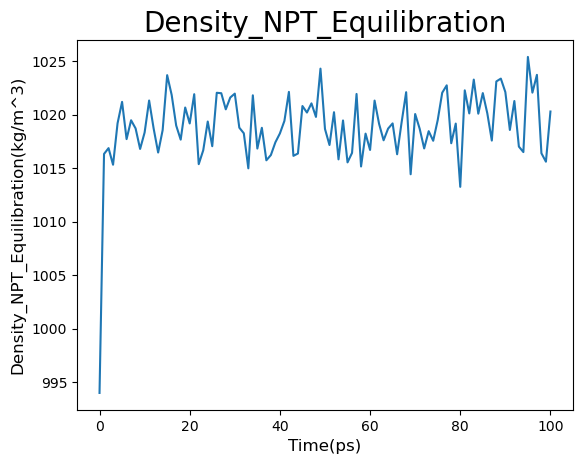

In [14]:
quantity_vs_time(step, "Step(No.)", pot_e, 'Potential_energy_Minimization', 'kJ/mol')
quantity_vs_time(time_tem,"Time(ps)", temp ,'Temperature_NVT_Equilibration', 'K')
quantity_vs_time(time_pre,"Time(ps)", press,'Pressure_NPT_Equilibration', 'bar')
quantity_vs_time(time_den,"Time(ps)",dens, 'Density_NPT_Equilibration', 'kg/m^3')

# Part2 -- make RMSD plots for 1ns and 50ns MD

### a) load in the data file

In [15]:
time_rmsd , rmsd= np.loadtxt('./rmsd.xvg', skiprows=18, unpack=True)
time_rmsd_xtal ,rmsd_xtal = np.loadtxt('./rmsd_xtal.xvg', skiprows=18, unpack=True)

time_rmsd50 , rmsd50= np.loadtxt('./rmsd50ns.xvg', skiprows=18, unpack=True)
time_rmsd_xtal50 ,rmsd_xtal50 = np.loadtxt('./rmsd_xtal50ns.xvg', skiprows=18, unpack=True)

### b) make RMSD plots

Plot saved: ../Figures/RMSD_in_1nsMD.pdf


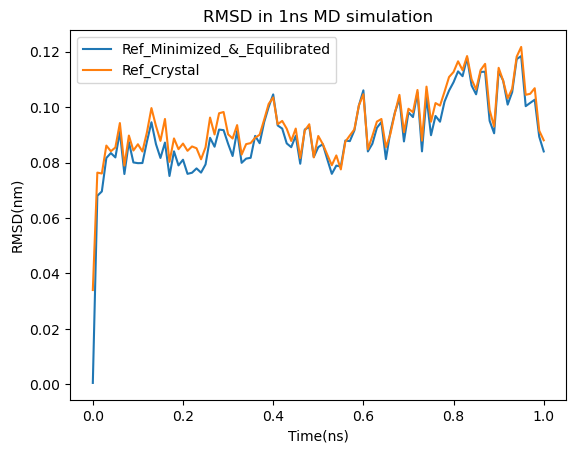

In [16]:
plt.plot(time_rmsd , rmsd ,label='Ref_Minimized_&_Equilibrated')
plt.plot(time_rmsd_xtal ,rmsd_xtal,label='Ref_Crystal')
plt.xlabel('Time(ns)')
plt.ylabel('RMSD(nm)')
plt.title('RMSD in 1ns MD simulation')
plt.savefig(f"../Figures/RMSD_in_1nsMD.pdf", format="pdf")
print("Plot saved: ../Figures/RMSD_in_1nsMD.pdf")
plt.legend()
plt.show() 

Plot saved: ../Figures/RMSD_in_50nsMD.pdf


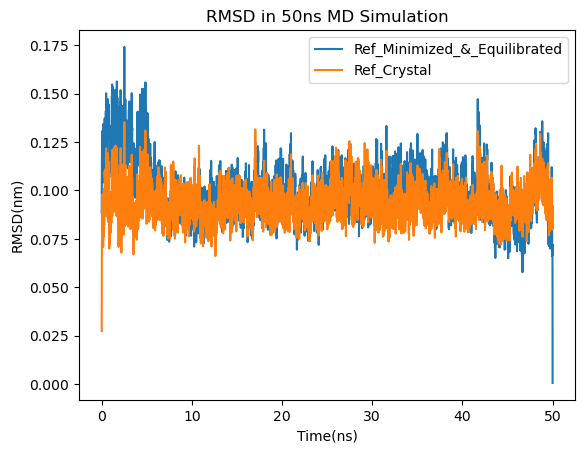

In [17]:
plt.plot(time_rmsd50 , rmsd50 ,label='Ref_Minimized_&_Equilibrated')
plt.plot(time_rmsd_xtal50 ,rmsd_xtal50,label='Ref_Crystal')
plt.xlabel('Time(ns)')
plt.ylabel('RMSD(nm)')
plt.title('RMSD in 50ns MD Simulation')
plt.savefig(f"../Figures/RMSD_in_50nsMD(1AKI,Backbone).pdf", format="pdf")
print("Plot saved: ../Figures/RMSD_in_50nsMD.pdf")
plt.legend()
plt.show() 

# Part3 -- make Radius of Gyration(Rg) plots for 1ns and 50ns MD

### a) load in the data file

In [18]:
time_R , Rg , Rg_x, Rg_y, Rg_z= np.loadtxt('./gyrate.xvg', skiprows=27, unpack=True)
time_R50 , Rg50 , Rg_x50, Rg_y50, Rg_z50= np.loadtxt('./gyrate50ns.xvg', skiprows=27, unpack=True)

### b) make Rg plots

Plot saved: ../Figures/Rg_in_1nsMD.pdf


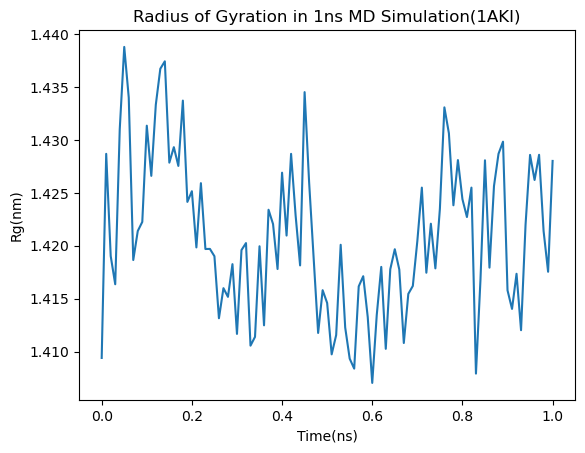

In [22]:
plt.plot(time_R/1000 , Rg )
plt.xlabel('Time(ns)')
plt.ylabel('Rg(nm)')
plt.title('Radius of Gyration in 1ns MD Simulation(1AKI)')
plt.savefig(f"../Figures/Rg_in_1nsMD.pdf", format="pdf")
print("Plot saved: ../Figures/Rg_in_1nsMD.pdf")
#plt.legend()
plt.show() 

Plot saved: ../Figures/Rg_in_50nsMD.pdf


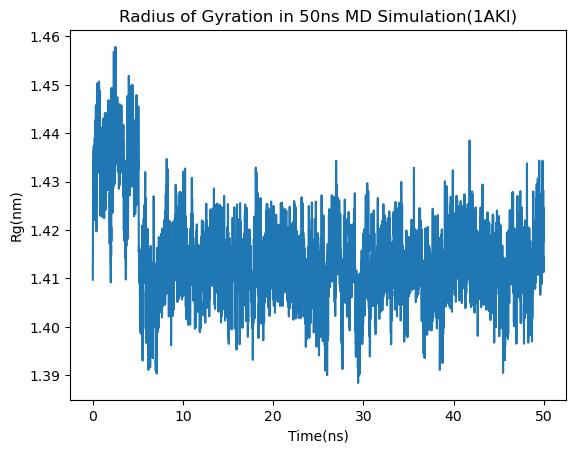

In [23]:
plt.plot(time_R50/1000 , Rg50 )
plt.xlabel('Time(ns)')
plt.ylabel('Rg(nm)')
plt.title('Radius of Gyration in 50ns MD Simulation(1AKI)')
plt.savefig(f"../Figures/Rg_in_50nsMD.pdf", format="pdf")
print("Plot saved: ../Figures/Rg_in_50nsMD.pdf")
#plt.legend()
plt.show() 